# **BUDGET ANALYSIS**

## **Preperations**

In [117]:
#Import necessary libraries
import pandas as pd
from numpy import random
import requests
import os
import plaid
import datetime
from dotenv import load_dotenv
import json
%matplotlib inline

In [118]:
#Access .env files.
load_dotenv()

True

In [119]:
#Access API keys.
PLAID_CLIENT_ID=os.getenv("PLAID_CLIENT_ID")
PLAID_PUBLIC_KEY=os.getenv("PLAID_PUBLIC_KEY")
PLAID_SANDBOX_KEY=os.getenv("PLAID_SANDBOX_KEY")

In [120]:
len(PLAID_PUBLIC_KEY)

30

In [121]:
#Create client object for Plaid
client=plaid.Client(client_id=PLAID_CLIENT_ID,public_key=PLAID_PUBLIC_KEY,secret=PLAID_SANDBOX_KEY,environment="sandbox")

In [122]:
#client.Institutions.get(1)

## **Plaid Access Token**

In [123]:
#Generate a Plaid access token to access the Developer Sandbox.
INSTITUTION_ID="ins_109508"

In [124]:
public_token_generator=client.Sandbox.public_token.create(INSTITUTION_ID,["transactions","income","assets"])

In [125]:
public_token_generator

{'public_token': 'public-sandbox-d4478fb2-459f-41bc-8bcc-fd0e8d6af3be',
 'request_id': 'p5mxgkt6X8nU8HZ'}

In [126]:
exchange_response=client.Item.public_token.exchange(public_token_generator["public_token"])

In [127]:
exchange_response

{'access_token': 'access-sandbox-322eb477-b991-4f85-8838-f6f5a71483ed',
 'item_id': 'NdvElRbEMGhgx4aRXeZQCZV3laXvlytWqBpBr',
 'request_id': 'QpkWnnxeQgjFhun'}

In [128]:
access_token=exchange_response["access_token"]

In [129]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'erlpgvQpyohbJ9qpzrkei3Vm9o5BJKSL5vbQG',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'QNwqrJgq7KhGvjDmo78Kfo6VQyxGgPip7PgXn',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'ZLX4PqD4pNhJvoNGmzw8ILwayZzM6KugXaEpw',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

## **Account Transactions with Plaid**

In [130]:
#Use the Access token to fetch the last 90 days of account transactions from the sandbox.
start_date="{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-90))
end_date="{:%Y-%m-%d}".format(datetime.datetime.now())

In [131]:
transactions_response=client.Transactions.get(access_token,start_date,end_date)

In [132]:
transactions_response

{'accounts': [{'account_id': 'erlpgvQpyohbJ9qpzrkei3Vm9o5BJKSL5vbQG',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'QNwqrJgq7KhGvjDmo78Kfo6VQyxGgPip7PgXn',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'ZLX4PqD4pNhJvoNGmzw8ILwayZzM6KugXaEpw',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

In [133]:
# Create a for-loop to print the categories for each transaction
for transactions in transactions_response["transactions"]:
    print(transactions["category"])

['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']


In [134]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
budget_analysis_df=pd.DataFrame()

In [135]:
date=[]
name=[]
amount=[]
category=[]  

In [136]:
# Populate the transactions DataFrame with the transactions data
for transactions in transactions_response["transactions"]:
    date.append(transactions["date"])
    name.append(transactions["name"])
    amount.append(transactions["amount"])
    category.append(transactions["category"])

In [137]:
budget_analysis_df["date"]=date
budget_analysis_df["name"]=name
budget_analysis_df["amount"]=amount
budget_analysis_df["category"]=category

In [138]:
budget_analysis_df.head()

,date,name,amount,category
0,2020-07-27,Uber 072515 SF**POOL**,6.33,"[Travel, Taxi]"
1,2020-07-24,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
2,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
3,2020-07-23,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"
4,2020-07-23,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"


In [139]:
# Display data types.
budget_analysis_df.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [140]:
# Set the date column as index and make any data type transformation.
budget_analysis_df = budget_analysis_df.set_index(pd.to_datetime(budget_analysis_df["date"], infer_datetime_format=True)).copy()

In [141]:
budget_analysis_df = budget_analysis_df.sort_index()

In [142]:
budget_analysis_df

,date,name,amount,category
date,,,,
2020-06-29,2020-06-29,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
2020-07-09,2020-07-09,INTRST PYMNT,-4.22,"[Transfer, Credit]"
2020-07-10,2020-07-10,SparkFun,89.40,"[Food and Drink, Restaurants]"
2020-07-11,2020-07-11,McDonald's,12.00,"[Food and Drink, Restaurants, Fast Food]"
2020-07-11,2020-07-11,Starbucks,4.33,"[Food and Drink, Restaurants, Coffee Shop]"
2020-07-12,2020-07-12,Touchstone Climbing,78.50,"[Recreation, Gyms and Fitness Centers]"
2020-07-12,2020-07-12,United Airlines,-500.00,"[Travel, Airlines and Aviation Services]"
2020-07-13,2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.00,"[Transfer, Debit]"
2020-07-13,2020-07-13,CD DEPOSIT .INITIAL.,1000.00,"[Transfer, Deposit]"


In [143]:
budget_analysis_df=budget_analysis_df.drop(columns=["date"])

In [144]:
budget_analysis_df

,name,amount,category
date,,,
2020-06-29,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
2020-07-09,INTRST PYMNT,-4.22,"[Transfer, Credit]"
2020-07-10,SparkFun,89.40,"[Food and Drink, Restaurants]"
2020-07-11,McDonald's,12.00,"[Food and Drink, Restaurants, Fast Food]"
2020-07-11,Starbucks,4.33,"[Food and Drink, Restaurants, Coffee Shop]"
2020-07-12,Touchstone Climbing,78.50,"[Recreation, Gyms and Fitness Centers]"
2020-07-12,United Airlines,-500.00,"[Travel, Airlines and Aviation Services]"
2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.00,"[Transfer, Debit]"
2020-07-13,CD DEPOSIT .INITIAL.,1000.00,"[Transfer, Deposit]"


In [145]:
budget_analysis_df.dtypes

name         object
amount      float64
category     object
dtype: object

## **Income Analysis with Plaid**

In [146]:
# Get the income data.
start_date2="{:%Y-%m-%d}".format(datetime.datetime.now()+datetime.timedelta(-365))
end_date2="{:%Y-%m-%d}".format(datetime.datetime.now())

In [147]:
income_response=client.Income.get(access_token)

In [148]:
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': '0jcUbjqFsRXUTJ4'}

In [149]:
# Determine the previous year's gross income and print the results
previous_year_gross=income_response["income"]["last_year_income_before_tax"]

In [150]:
previous_year_gross

7285

In [151]:
# Determine the current monthly income and print the results.

In [152]:
current_monthly_income=income_response["income"]["income_streams"][0]["monthly_income"]

In [153]:
current_monthly_income

500

In [154]:
# Determine the projected yearly income and print the results.
projected_yearly_income=income_response["income"]["projected_yearly_income"]

In [155]:
projected_yearly_income

6085

## **Budget Analysis**

In [156]:
# Compute and display the total expenses per category.

budget_analysis_df.sample()

,name,amount,category
date,,,
2020-07-11,McDonald's,12.0,"[Food and Drink, Restaurants, Fast Food]"


In [157]:
category_breakdown = budget_analysis_df["category"].value_counts()

In [158]:
category_breakdown

[Travel, Taxi]                                2
[Travel, Airlines and Aviation Services]      2
[Food and Drink, Restaurants, Fast Food]      2
[Food and Drink, Restaurants]                 2
[Recreation, Gyms and Fitness Centers]        1
[Transfer, Credit]                            1
[Shops, Sporting Goods]                       1
[Transfer, Debit]                             1
[Payment, Credit Card]                        1
[Food and Drink, Restaurants, Coffee Shop]    1
[Payment]                                     1
[Transfer, Deposit]                           1
Name: category, dtype: int64

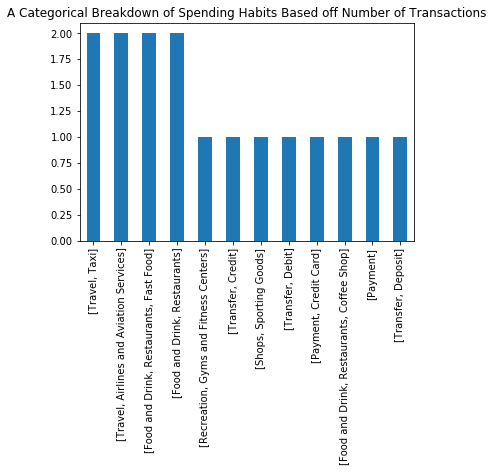

In [159]:
category_breakdown.plot(kind="bar",title="A Categorical Breakdown of Spending Habits Based off Number of Transactions",x="Category",y="Number of Transactions")

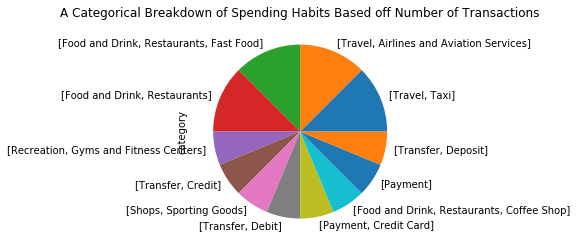

In [160]:
# Create a spending categories pie chart.
category_breakdown.plot.pie(legend=None, title="A Categorical Breakdown of Spending Habits Based off Number of Transactions")

In [161]:
# Create a DataFrame with the total expenses
budget_analysis_df.head(2)

,name,amount,category
date,,,
2020-06-29,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
2020-07-09,INTRST PYMNT,-4.22,"[Transfer, Credit]"


In [162]:
budget_analysis_df.index

DatetimeIndex(['2020-06-29', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-11', '2020-07-12', '2020-07-12', '2020-07-13',
               '2020-07-13', '2020-07-14', '2020-07-14', '2020-07-23',
               '2020-07-23', '2020-07-23', '2020-07-24', '2020-07-27'],
              dtype='datetime64[ns]', name='date', freq=None)

In [163]:
budget_analysis_df["year"]=budget_analysis_df.index.year
budget_analysis_df["month"]=budget_analysis_df.index.month
budget_analysis_df["day"]=budget_analysis_df.index.day

In [164]:
budget_analysis_grp = budget_analysis_df.groupby(["year","month"]).sum()

In [165]:
budget_analysis_grp

amount  day
year month               
2020 6        500.00   29
     7      10145.24  239

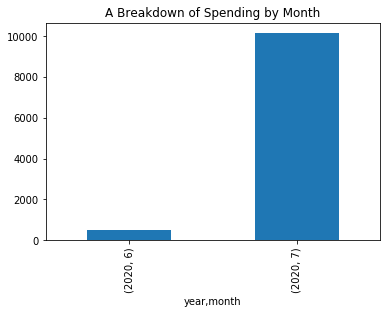

In [166]:
# Create a spending per month bar chart
budget_analysis_grp["amount"].plot(kind="bar", title="A Breakdown of Spending by Month")

# **RETIREMENT PLANNER**

## **Preperations**

In [167]:
# Import extra libraries and dependencies.
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
# Set the random seed for resutls reproducibility (for testing purposes only).
np.random.seed(42)

## **Portfolio Planner**

In [168]:
# Set Alpaca API key and secret key
ALPACA_API_KEY=os.getenv("ALPACA_API_KEY")
ALPACA_SECRET_KEY=os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api=tradeapi.REST(ALPACA_API_KEY,ALPACA_SECRET_KEY,api_version="v2")

In [169]:
len(ALPACA_API_KEY)

20

## **Data Collection**

In [170]:
# Pull a years worth of return data for "SPY" and "AGG".
ticker=["SPY","AGG"]
timeframe="1D"

start_date=pd.Timestamp("2019-07-23",tz="America/New_York").isoformat()
end_date=pd.Timestamp("2020-07-24",tz="America/New_York").isoformat()

df=api.get_barset(ticker,timeframe,limit=None,start=start_date,end=end_date,after=None,until=None).df

In [171]:
df

AGG                                          \
                             open      high       low     close    volume   
time                                                                        
2019-07-23 00:00:00-04:00  111.27  111.3200  111.1600  111.2000   2380357   
2019-07-24 00:00:00-04:00  111.33  111.4100  111.2950  111.3600   2583309   
2019-07-25 00:00:00-04:00  111.33  111.3300  111.0474  111.2000   2691764   
2019-07-26 00:00:00-04:00  111.32  111.3200  111.1400  111.2295   3324597   
2019-07-29 00:00:00-04:00  111.30  111.3500  111.2200  111.2400   3601926   
2019-07-30 00:00:00-04:00  111.27  111.3300  111.1600  111.2600   1961423   
2019-07-31 00:00:00-04:00  111.30  111.5900  111.0700  111.3000   7434391   
2019-08-01 00:00:00-04:00  111.34  111.9500  111.2600  111.9095   4537852   
2019-08-02 00:00:00-04:00  111.93  112.0400  111.8200  111.9600   2757388   
2019-08-05 00:00:00-04:00  112.28  112.5800  112.2500  112.4600   6965437   
2019-08-06 00:00:00-04:00  112.47  112.7600  112.4000  112.7200   4196665   
2019-08-07 00:00:00-04:00  113.17  113.2900  112.6100  112.6800   8588290   
2019-08-08 00:00:00-04:00  112.51  112.8200  112.3300  112.7800   3340919   
2019-08-09 00:00:00-04:00  112.86  112.9500  112.5750  112.6300   2152921   
2019-08-12 00:00:00-04:00  112.93  113.1850  112.8700  113.0650   1581109   
2019-08-13 00:00:00-04:00  113.15  113.1504  112.7850  112.8900   2452786   
2019-08-14 00:00:00-04:00  113.28  113.3800  113.2100  113.2600   2543412   
2019-08-15 00:00:00-04:00  113.39  113.9100  113.3700  113.7600   2654437   
2019-08-16 00:00:00-04:00  113.57  113.6850  113.3600  113.6700   4828939   
2019-08-19 00:00:00-04:00  113.34  113.4600  113.2700  113.3700   2650873   
2019-08-20 00:00:00-04:00  113.67  113.7000  113.5600  113.6900   2143854   
2019-08-21 00:00:00-04:00  113.51  113.8250  113.5100  113.6200   3238867   
2019-08-22 00:00:00-04:00  113.51  113.6791  113.3001  113.3205   5461413   
2019-08-23 00:00:00-04:00  113.34  113.9099  113.3100  113.7900   3372807   
2019-08-26 00:00:00-04:00  113.84  113.9500  113.6700  113.7300   3428084   
2019-08-27 00:00:00-04:00  113.91  114.1200  113.8700  114.0900   2005511   
2019-08-28 00:00:00-04:00  114.30  114.3000  114.0400  114.1100   4006428   
2019-08-29 00:00:00-04:00  114.08  114.0800  113.8350  114.0300   2476914   
2019-08-30 00:00:00-04:00  113.90  114.1500  113.8900  114.1250   3707090   
2019-09-03 00:00:00-04:00  113.86  114.1200  113.6900  113.8550   5281206   
...                           ...       ...       ...       ...       ...   
2020-06-12 00:00:00-04:00  117.60  117.7000  117.5700  117.6400   1790030   
2020-06-15 00:00:00-04:00  117.72  117.9800  117.6100  117.9400   8120154   
2020-06-16 00:00:00-04:00  117.98  118.0000  117.5900  117.6800   9274606   
2020-06-17 00:00:00-04:00  117.74  117.7600  117.4700  117.6400   7241112   
2020-06-18 00:00:00-04:00  117.88  117.8800  117.6400  117.7900   5689912   
2020-06-19 00:00:00-04:00  117.80  117.9700  117.7400  117.8300   5269076   
2020-06-22 00:00:00-04:00  118.00  118.0000  117.7300  117.7700   3189556   
2020-06-23 00:00:00-04:00  117.79  117.8250  117.6900  117.7200   3845665   
2020-06-24 00:00:00-04:00  117.70  117.8400  117.6100  117.7500   4714563   
2020-06-25 00:00:00-04:00  117.94  117.9500  117.8000  117.8500   4338474   
2020-06-26 00:00:00-04:00  117.99  118.0800  117.8450  118.0200   5537471   
2020-06-29 00:00:00-04:00  118.01  118.1100  117.9500  118.0900   3212966   
2020-06-30 00:00:00-04:00  118.28  118.3200  117.9800  118.2000   5643934   
2020-07-01 00:00:00-04:00  117.90  118.0700  117.7600  118.0300   6247232   
2020-07-02 00:00:00-04:00  118.05  118.2100  117.9900  118.1800   3317392   
2020-07-06 00:00:00-04:00  118.18  118.2100  118.0000  118.1600   4663625   
2020-07-07 00:00:00-04:00  118.23  118.3800  118.0600  118.3600   5373298   
2020-07-08 00:00:00-04:00  118.35  118.4500  118.2200  118.3050   3942821   
2020-07-09 00:00:00-04:00 

In [172]:
# Clean the data frame.
df=df.drop(columns=["open","high","low","volume"],level=1)

In [173]:
df=df.sort_index()

In [174]:
df

,AGG,SPY
,close,close
time,,
2019-07-23 00:00:00-04:00,111.2000,299.9800
2019-07-24 00:00:00-04:00,111.3600,301.3800
2019-07-25 00:00:00-04:00,111.2000,299.9595
2019-07-26 00:00:00-04:00,111.2295,301.9900
2019-07-29 00:00:00-04:00,111.2400,301.4800
2019-07-30 00:00:00-04:00,111.2600,300.8200
2019-07-31 00:00:00-04:00,111.3000,297.4000
2019-08-01 00:00:00-04:00,111.9095,294.8800


## **Monte Carlo Simulation**

In [175]:
# Calculate the daily returns for the portfolio.
daily_returns=df.pct_change()

In [176]:
# Give a sample of the data.
daily_returns.sample()

,AGG,SPY
,close,close
time,,
2020-04-23 00:00:00-04:00,0.002562,-0.003037


In [177]:
# Calculate the volatility of the data.
daily_volatility=daily_returns.std()

In [178]:
daily_volatility

AGG  close    0.005549
SPY  close    0.021053
dtype: float64

Here we see that "AGG" is a less volatile stock than "SPY" making it the safer investment in the portfolio.

In [179]:
daily_volatility_agg = daily_volatility["AGG"]["close"]

In [180]:
daily_volatility_agg

0.00554927724338688

In [181]:
daily_volatility_spy = daily_volatility["SPY"]["close"]

In [182]:
daily_volatility_spy

0.021052727751028618

In [183]:
# Calculate the average daily return.

In [184]:
avg_dly_rtrn_agg=daily_returns["AGG"]["close"].mean()

In [185]:
avg_dly_rtrn_agg

0.00029200236162614664

In [186]:
avg_dly_rtrn_spy=daily_returns["SPY"]["close"].mean()

In [187]:
avg_dly_rtrn_spy

0.00048776753840452643

In [188]:
# Save the last day's closing price for each stock.
last_day_close_agg=df["AGG"]["close"][-1]

In [189]:
last_day_close_agg

119.29

In [190]:
last_day_close_spy=df["SPY"]["close"][-1]

In [191]:
last_day_close_spy

320.86

In [192]:
# Test to see if last closes are correct.
df.tail()

,AGG,SPY
,close,close
time,,
2020-07-20 00:00:00-04:00,118.98,324.360
2020-07-21 00:00:00-04:00,119.05,324.960
2020-07-22 00:00:00-04:00,119.18,326.820
2020-07-23 00:00:00-04:00,119.36,322.935
2020-07-24 00:00:00-04:00,119.29,320.860


In [193]:
# Setup the Monte Carlo Parameters.
num_simulations=500
num_trading_days=252*30

In [194]:
simulated_price_df=pd.DataFrame()
portfolio_cumulative_returns=pd.DataFrame()

In [195]:
for simulations in range(num_simulations):
    simulated_agg_prices=[last_day_close_agg]
    simulated_spy_prices=[last_day_close_spy]
    for days in range(num_trading_days):
        simulated_agg_price=simulated_agg_prices[-1]*(1+np.random.normal(avg_dly_rtrn_agg,daily_volatility_agg))
        simulated_spy_price=simulated_spy_prices[-1]*(1+np.random.normal(avg_dly_rtrn_spy,daily_volatility_spy))
        
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
    
    simulated_price_df["AGG"]=simulated_agg_prices
    simulated_price_df["SPY"]=simulated_spy_prices
    
    simulated_daily_returns=simulated_price_df.pct_change()
    weights=[0.40,0.60]
    portfolio_daily_returns=simulated_daily_returns.dot(weights)
    portfolio_cumulative_returns[simulations]= (1+portfolio_daily_returns.fillna(0)).cumprod()
    

In [196]:
simulated_price_df.head()

,AGG,SPY
0,119.290000,320.860000
1,119.355834,325.196857
2,119.568467,335.527923
3,119.541702,339.628101
4,118.142304,342.988676


In [197]:
portfolio_cumulative_returns.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
7556,23.749540,5.299556,20.348104,6.515192,12.196293,51.913057,10.828478,5.382792,77.036082,32.147129,...,34.465343,11.413492,25.303695,13.133293,11.540795,24.182788,8.964905,18.872322,4.925498,4.340108
7557,23.428780,5.311633,20.519451,6.507113,12.397483,51.615292,10.974999,5.222268,77.890904,32.030343,...,34.629388,11.509744,25.497161,12.894762,11.606168,24.009786,9.105102,18.625263,4.985301,4.325699
7558,23.017805,5.408249,20.532152,6.511598,12.391064,51.653566,10.850487,5.075330,77.214805,31.952940,...,34.232287,11.590999,25.692532,12.569015,11.595341,24.207597,9.076108,18.499582,4.921033,4.329976
7559,23.183724,5.392971,20.193171,6.433873,12.422702,51.870055,10.856403,5.122886,78.051761,32.101795,...,33.898918,11.588603,25.862931,12.778025,11.480316,23.999254,8.888004,18.387151,5.010059,4.372214
7560,22.836127,5.409639,19.923557,6.550014,12.199576,51.080467,10.846362,5.119521,79.384584,31.169248,...,34.131993,11.799282,25.944140,12.768103,11.315055,24.170929,8.889244,18.308269,5.052439,4.352822


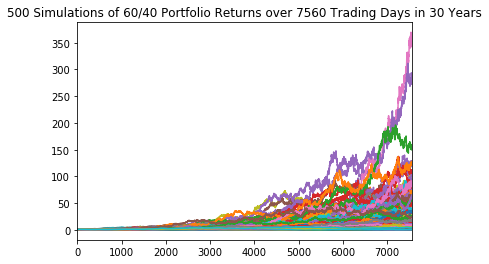

In [198]:
# Full 30 Year Cumulative Return Simulation Plot
plot_title=f"{num_simulations} Simulations of 60/40 Portfolio Returns over {num_trading_days} Trading Days in 30 Years"
portfolio_cumulative_returns.plot(legend=None,title=plot_title)

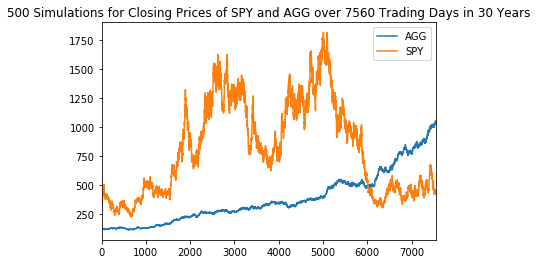

In [199]:
# General simulated closing prices plot.
plot_title2=f"{num_simulations} Simulations for Closing Prices of SPY and AGG over {num_trading_days} Trading Days in 30 Years"
simulated_price_df.plot(title=plot_title2)

In [200]:
# Select the last row of the general monte carlo data frame for the cumulative returns (cumulative returns at 20 years)
simulated_price_df[-1:]

,AGG,SPY
7560,1038.167418,431.900661


In [201]:
# Check if its last.
simulated_price_df.tail()

,AGG,SPY
7556,1036.406924,430.307731
7557,1036.547289,427.887938
7558,1038.899873,427.945540
7559,1040.355164,434.503433
7560,1038.167418,431.900661


In [202]:
last_row = simulated_price_df[-1:]

In [203]:
last_row_daily_return = simulated_daily_returns[-1:]

In [204]:
last_row_daily_return

,AGG,SPY
7560,-0.002103,-0.00599


In [205]:
# Check if last.
simulated_daily_returns.tail()

,AGG,SPY
7556,-0.004570,-0.008175
7557,0.000135,-0.005623
7558,0.002270,0.000135
7559,0.001401,0.015324
7560,-0.002103,-0.005990


In [206]:
cumulative_returns_20yr=(1+last_row_daily_return).cumprod()

In [207]:
cumulative_returns_20yr

,AGG,SPY
7560,0.997897,0.99401


In [208]:
# I actually think this is what I should be using. 
last_port_cumulative_ret = portfolio_cumulative_returns.iloc[-1,:]

In [209]:
last_port_cumulative_ret

0       22.836127
1        5.409639
2       19.923557
3        6.550014
4       12.199576
5       51.080467
6       10.846362
7        5.119521
8       79.384584
9       31.169248
10      36.450613
11      17.371349
12       5.933783
13       2.140859
14       5.324015
15       3.906984
16      16.971631
17      10.714581
18       4.217006
19       7.072588
20       8.577268
21      56.132509
22      18.336318
23       1.354064
24       6.150163
25      11.248928
26      13.267037
27      26.011772
28      15.217406
29       3.422551
          ...    
470     11.528964
471      2.743543
472      2.238175
473     36.105982
474      3.736495
475      1.135601
476      3.997316
477      7.908240
478      2.813259
479      2.058734
480      1.108637
481    126.814286
482     25.102314
483      5.606579
484     60.769217
485      3.972800
486     83.313305
487      5.229404
488      7.421982
489      1.013239
490     34.131993
491     11.799282
492     25.944140
493     12.768103
494     11

In [210]:
# Display the 90% confidence interval for the ending returns
confidence_interval= last_port_cumulative_ret.quantile(q=[0.05,0.95])

In [211]:
confidence_interval

0.05     1.868195
0.95    65.039301
Name: 7560, dtype: float64

In [212]:
# Visualize the distribution of the ending returns

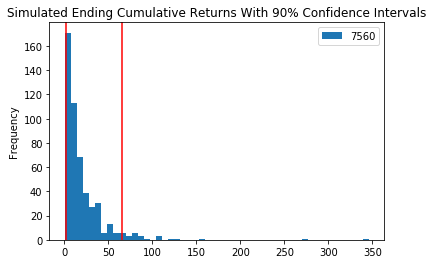

In [213]:
last_port_cumulative_ret.plot.hist(legend=True,bins=50, title="Simulated Ending Cumulative Returns With 90% Confidence Intervals")
plt.axvline(confidence_interval.iloc[0],color='r')
plt.axvline(confidence_interval.iloc[1],color='r')

# **RETIREMENT ANALYSIS**

**1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?**

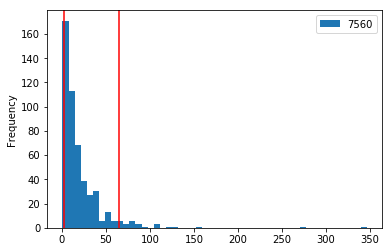

In [214]:
# 90th Percentiles.
last_port_cumulative_ret.plot.hist(legend=True,bins=50)
plt.axvline(confidence_interval.iloc[0],color='r')
plt.axvline(confidence_interval.iloc[1],color='r')

In [215]:
cum_90_perct = last_port_cumulative_ret.quantile(0.9)

In [216]:
print(f"The expected cumulative returns at 30 years for the 90'th percentile is {round(cum_90_perct,2)}")

The expected cumulative returns at 30 years for the 90'th percentile is 44.61


In [217]:
# 50th Percentiles.
confidence_interval_fifty=last_port_cumulative_ret.quantile(q=[0.25,0.75])

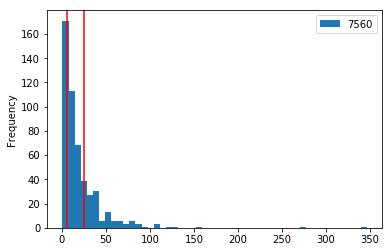

In [218]:
last_port_cumulative_ret.plot.hist(legend=True,bins=50)
plt.axvline(confidence_interval_fifty.iloc[0],color='r')
plt.axvline(confidence_interval_fifty.iloc[1],color='r')

In [219]:
cum_50_perct = last_port_cumulative_ret.quantile(0.5)

In [220]:
print(f"The expected cumulative returns at 30 years for the 50'th percentile is {round(cum_50_perct,2)}")

The expected cumulative returns at 30 years for the 50'th percentile is 11.86


In [221]:
# 10th Percentiles.
confidence_interval_tenth=last_port_cumulative_ret.quantile(q=[0.1,0.9])

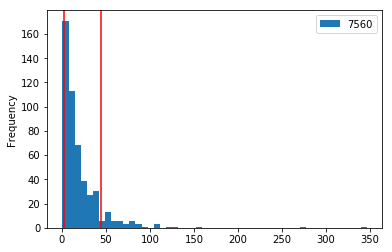

In [222]:
last_port_cumulative_ret.plot.hist(legend=True,bins=50)
plt.axvline(confidence_interval_tenth.iloc[0],color='r')
plt.axvline(confidence_interval_tenth.iloc[1],color='r')

In [223]:
cum_10_perct = last_port_cumulative_ret.quantile(0.1)

In [224]:
print(f"The expected cumulative returns at 30 years for the 10'th percentile is {round(cum_10_perct,2)}")

The expected cumulative returns at 30 years for the 10'th percentile is 2.81


In [225]:
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007885,0.989530,0.987434,0.982331,1.001555,0.999226,0.991236,0.973839,1.008436,1.015533,...,0.984873,1.003187,0.991985,1.011152,0.995489,1.001024,0.994893,1.012908,0.995254,1.008331
2,1.011927,0.993790,0.996768,0.980799,1.009841,1.000265,0.987716,0.971829,0.986275,1.016978,...,0.985560,0.989673,0.959755,1.010022,0.988403,1.018779,0.983385,1.000990,0.966036,1.028269
3,1.026131,0.998475,1.003792,0.991327,1.000681,0.964732,0.995144,0.965883,0.988067,1.024247,...,0.991886,1.004817,0.976173,1.000418,0.991533,1.018205,0.994092,1.022879,0.966248,1.035716
4,1.008310,1.006534,1.008767,1.006156,0.991187,0.971839,0.997884,0.966151,0.981989,1.036294,...,0.998777,1.020604,0.977661,0.986750,0.976491,1.031385,1.006318,1.013931,0.965799,1.037016


**2. Given an initial investment of $20,000, what is the expected return in dollars at the 10th, 50th, and 90th percentiles?**

In [226]:
# 10th Percentile.
cum_10_perct

2.8057457975493465

In [227]:
investment=20_000
returns_at10=investment*cum_10_perct

In [228]:
returns_at10

56114.91595098693

In [229]:
# 50th Percentile.

In [230]:
cum_50_perct

11.858431011476856

In [231]:
returns_at50=investment*cum_50_perct

In [232]:
returns_at50

237168.62022953713

In [233]:
# 90th Percentile.

In [234]:
cum_90_perct

44.6091093053367

In [235]:
returns_at90=investment*cum_90_perct

In [236]:
returns_at90

892182.1861067341

With an initial investment of $20,000.00 the expected returns in dollars at the 10th, 50th, and 90th percentiles would be as follows:

10th Percentile: $56,991.51

50th Percentile: $240,807.09

90th Percentile: $905,736.76

**3. Given the current projected annual income from the Plaid analysis, will a 4% withdrawal rate meet or exceed that value at the 10th percentile? Note: This is basically determining if retirement income is equivalent to current income.**

In [237]:
retirement_income=0.04*(projected_yearly_income*cum_10_perct)

In [250]:
projected_yearly_income

6085

In [238]:
rate_2=0.04*(investment*cum_10_perct)

In [239]:
retirement_income

682.9185271235109

In [240]:
rate_2

2244.596638039477

In [241]:
print(f"Here if one invests the projected yearly income of ${projected_yearly_income} then with a 4% withdrawal rate we predict a 10'th percentile value of ${round(retirement_income,2)}. This would be less than if we did a 4% withdrawal rate with an initial investment of $20,000.00 which would be ${round(rate_2,2)}. This would also be less than the general 10th percentile projected return of an investment of $20,000.00 which would be ${round(returns_at10,2)}") 

Here if one invests the projected yearly income of $6085 then with a 4% withdrawal rate we predict a 10'th percentile value of $682.92. This would be less than if we did a 4% withdrawal rate with an initial investment of $20,000.00 which would be $2244.6. This would also be less than the general 10th percentile projected return of an investment of $20,000.00 which would be $56114.92


**4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal? In other words, what happens if the initial investment had been bigger?**

In [251]:
# Increased $20,000.00 investment by 50%
investment_larger = 30_000

In [243]:
returns_at10_larger = 0.04*(investment_larger)*(cum_10_perct)

In [244]:
returns_at10_larger

3366.894957059216

In [245]:
returns_at50_larger = 0.04*(investment_larger)*(cum_50_perct)

In [246]:
returns_at50_larger

14230.117213772228

In [247]:
returns_at90_larger = 0.04*(investment_larger)*(cum_90_perct)

In [248]:
returns_at90_larger

53530.93116640404

In [253]:
# Increased projected yearly income by 50%
projected_yrly_larger = 9127.50

In [254]:
returns_at10_larger_yrly_in = 0.04*(projected_yrly_larger)*(cum_10_perct)

In [255]:
returns_at10_larger_yrly_in

1024.3777906852665

In [256]:
returns_at50_larger_yrly_in = 0.04*(projected_yrly_larger)*(cum_50_perct)

In [257]:
returns_at50_larger_yrly_in

4329.513162290201

In [258]:
returns_at90_larger_yrly_in = 0.04*(projected_yrly_larger)*(cum_90_perct)

In [259]:
returns_at90_larger_yrly_in

16286.78580737843

In [261]:
print(f"If the initial investment was ${investment_larger}.00 as opposed to ${investment}.00 the returns for the retirement account with the 4% retirement withdrawal would be ${round(returns_at10_larger,2)} for the 10th percentile, ${round(returns_at50_larger,2)} for the 50th percentile, and ${round(returns_at90_larger,2)} for the 90th percentile. So one can see that if the initial investment is/was bigger, then the returns would be larger as well. The same goes if we increase the projected yearly income of ${projected_yearly_income}.00 by 50% to ${projected_yrly_larger}0. We would then get ${round(returns_at10_larger_yrly_in,2)} for the 10th percentile, ${round(returns_at50_larger_yrly_in,2)} for the 50th percentile, and ${round(returns_at90_larger_yrly_in,2)} for the 90th percentile. Again, increasing the investment increases the returns.")

If the initial investment was $30000.00 as opposed to $20000.00 the returns for the retirement account with the 4% retirement withdrawal would be $3366.89 for the 10th percentile, $14230.12 for the 50th percentile, and $53530.93 for the 90th percentile. So one can see that if the initial investment is/was bigger, then the returns would be larger as well. The same goes if we increase the projected yearly income of $6085.00 by 50% to $9127.50. We would then get $1024.38 for the 10th percentile, $4329.51 for the 50th percentile, and $16286.79 for the 90th percentile. Again, increasing the investment increases the returns.
